In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import seaborn as sns

In [2]:
data_filepath = pathlib.Path('churn.csv')
data_filepath

PosixPath('churn.csv')

In [3]:
data_filepath.exists()

True

In [4]:
data_filepath.is_dir()

False

In [5]:
assert data_filepath.exists(), f'{data_filepath} does not exist'

In [6]:
%%timeit

pd.read_csv(data_filepath)

20.2 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%%timeit

pl.read_csv(data_filepath)

2.35 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
df_pd = pd.read_csv(data_filepath)
df_pl = pl.read_csv(data_filepath)

In [9]:
df_pd.memory_usage(deep=True).sum()

8166479

In [10]:
df_pl.estimated_size()

1914043

In [12]:
df_pd.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df_pd['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

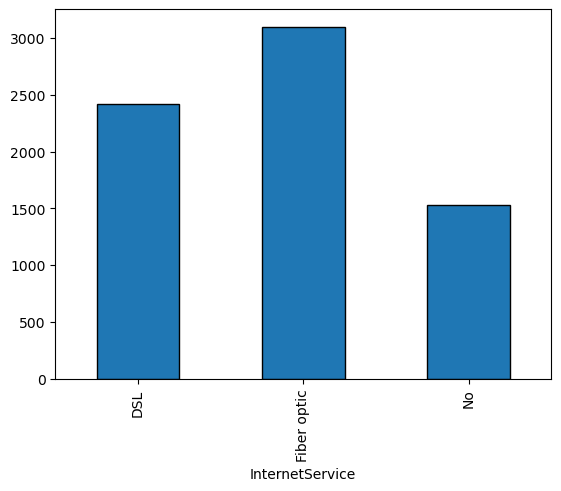

In [18]:
df_pd.groupby(
    'InternetService'
)['customerID'].nunique().plot(
    kind='bar',
    edgecolor='k',
);

In [29]:
%%timeit

df_pd.groupby(
    'InternetService'
).agg(
    number_of_customers=('customerID', 'nunique'),
    average_charge=('MonthlyCharges', 'mean'),
).reset_index()

4.17 ms ± 260 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
df_pd.groupby(
    'InternetService'
).agg(
    number_of_customers=('customerID', 'nunique'),
    average_charge=('MonthlyCharges', 'mean'),
).reset_index()

,InternetService,number_of_customers,average_charge
0,DSL,2421,58.102169
1,Fiber optic,3096,91.500129
2,No,1526,21.079194


In [35]:
df_pl.groupby(
    'InternetService'
).agg(
    pl.col('customerID').n_unique().alias('number_of_customers'),
    pl.col('MonthlyCharges').mean().alias('average_charge'),
)

InternetService,number_of_customers,average_charge
str,u32,f64
"""Fiber optic""",3096,91.500129
"""DSL""",2421,58.102169
"""No""",1526,21.079194


In [36]:
%%timeit

df_pl.groupby(
    'InternetService'
).agg(
    pl.col('customerID').n_unique().alias('number_of_customers'),
    pl.col('MonthlyCharges').mean().alias('average_charge'),
)

483 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [39]:
%%timeit

df_pl.lazy().groupby(
    'InternetService'
).agg(
    pl.col('customerID').n_unique().alias('number_of_customers'),
    pl.col('MonthlyCharges').mean().alias('average_charge'),
).collect()

475 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [48]:
df_pl.to_dummies('InternetService', drop_first=True).head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService_Fiber optic,InternetService_No,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,u8,u8,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone servi…",0,0,"""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Electronic che…",29.85,29.85,"""No"""
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""",0,0,"""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No"""
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""",0,0,"""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Mailed check""",53.85,108.15,"""Yes"""
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone servi…",0,0,"""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer …",42.3,1840.75,"""No"""
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""",1,0,"""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Electronic che…",70.7,151.65,"""Yes"""


In [53]:
pd.get_dummies(df_pd['InternetService'], prefix='InternetService', drop_first=True).astype(int)

,InternetService_Fiber optic,InternetService_No
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7038,0,0
7039,1,0
7040,0,0
7041,1,0


In [59]:
temp = df_pd.copy()
dummy_columns = pd.get_dummies(temp['InternetService'], prefix='InternetService', drop_first=True).astype(int)
temp = pd.concat([temp, dummy_columns], axis=1)
temp = temp.drop(columns=['InternetService'])

In [60]:
temp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0


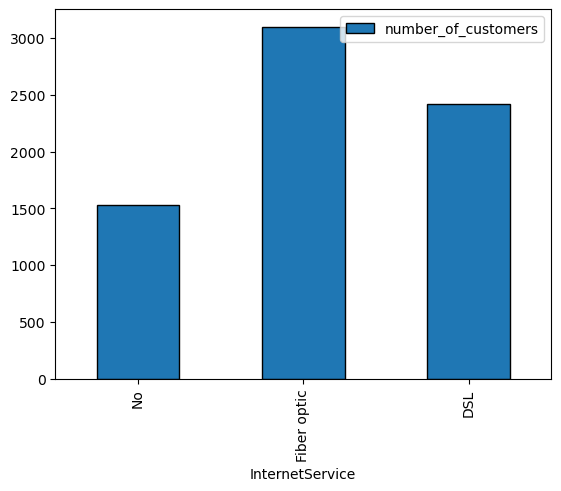

In [65]:
df_pl.groupby(
    'InternetService'
).agg(
    pl.col('customerID').n_unique().alias('number_of_customers'),
).to_pandas().plot(
    kind='bar',
    edgecolor='k',
    x='InternetService',
    y='number_of_customers',
);

In [74]:
df_pd['Churn'].map({'No': 0, 'Yes': 1})

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [75]:
df_pl.with_columns(
    pl.col('Churn').map_dict({'No': 0, 'Yes': 1})
).head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,i64
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone servi…","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Electronic che…",29.85,29.85,0
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,0
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Mailed check""",53.85,108.15,1
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone servi…","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer …",42.3,1840.75,0
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Electronic che…",70.7,151.65,1


In [72]:
df_pl.with_columns(
    pl.col(['PaperlessBilling', 'Churn']).map_dict({'No': 0, 'Yes': 1})
).head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,i64,str,f64,f64,i64
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone servi…","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…",1,"""Electronic che…",29.85,29.85,0
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""",0,"""Mailed check""",56.95,1889.5,0
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…",1,"""Mailed check""",53.85,108.15,1
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone servi…","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""",0,"""Bank transfer …",42.3,1840.75,0
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month…",1,"""Electronic che…",70.7,151.65,1


In [77]:
df_pl.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone servi…","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Electronic che…",29.85,29.85,"""No"""
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No"""
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Mailed check""",53.85,108.15,"""Yes"""
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone servi…","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer …",42.3,1840.75,"""No"""
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month…","""Yes""","""Electronic che…",70.7,151.65,"""Yes"""


In [78]:
df_pl.null_count()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0


In [90]:
binary_columns = []
for col in df_pl.columns:
    unique_vals = df_pl.get_column(col).unique().sort().to_list()
    if unique_vals == ['No', 'Yes']:
        binary_columns.append(col)

df_pl.with_columns(
    pl.col(binary_columns).map_dict({'No': 0, 'Yes': 1})
).head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,i64,str,f64,f64,i64
"""7590-VHVEG""","""Female""",0,1,0,1,0,"""No phone servi…","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…",1,"""Electronic che…",29.85,29.85,0
"""5575-GNVDE""","""Male""",0,0,0,34,1,"""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""",0,"""Mailed check""",56.95,1889.5,0
"""3668-QPYBK""","""Male""",0,0,0,2,1,"""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month…",1,"""Mailed check""",53.85,108.15,1
"""7795-CFOCW""","""Male""",0,0,0,45,0,"""No phone servi…","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""",0,"""Bank transfer …",42.3,1840.75,0
"""9237-HQITU""","""Female""",0,0,0,2,1,"""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month…",1,"""Electronic che…",70.7,151.65,1


In [112]:
columns_to_exclude = ['customerID']

string_columns = []
for (col, dtype) in zip(df_pl.columns, df_pl.dtypes):
    if col not in columns_to_exclude:
        if dtype == pl.Utf8:
            string_columns.append(col)

df_pl.to_dummies(string_columns, drop_first=True).head()

customerID,gender_Male,SeniorCitizen,Partner_No,Dependents_Yes,tenure,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn_Yes
str,u8,i64,u8,u8,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,u8
"""7590-VHVEG""",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
"""5575-GNVDE""",1,0,1,0,34,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,56.95,1889.5,0
"""3668-QPYBK""",1,0,1,0,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,53.85,108.15,1
"""7795-CFOCW""",1,0,1,0,45,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,42.3,1840.75,0
"""9237-HQITU""",0,0,1,0,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70.7,151.65,1


#### All together

In [113]:
df_pl = pl.read_csv(data_filepath)

binary_columns = []
for col in df_pl.columns:
    unique_vals = df_pl.get_column(col).unique().sort().to_list()
    if unique_vals == ['No', 'Yes']:
        binary_columns.append(col)

df_pl = df_pl.with_columns(
    pl.col(binary_columns).map_dict({'No': 0, 'Yes': 1})
)

columns_to_exclude = ['customerID']
string_columns = []
for (col, dtype) in zip(df_pl.columns, df_pl.dtypes):
    if col not in columns_to_exclude:
        if dtype == pl.Utf8:
            string_columns.append(col)

df_pl = df_pl.to_dummies(string_columns, drop_first=True)

In [114]:
df_pl

customerID,gender_Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn
str,u8,i64,i64,i64,i64,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,i64,u8,u8,u8,f64,f64,i64
"""7590-VHVEG""",0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.85,29.85,0
"""5575-GNVDE""",1,0,0,0,34,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,56.95,1889.5,0
"""3668-QPYBK""",1,0,0,0,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,53.85,108.15,1
"""7795-CFOCW""",1,0,0,0,45,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,42.3,1840.75,0
"""9237-HQITU""",0,0,0,0,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,70.7,151.65,1
"""9305-CDSKC""",0,0,0,0,8,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,99.65,820.5,1
"""1452-KIOVK""",1,0,0,1,22,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,89.1,1949.4,0
"""6713-OKOMC""",0,0,0,0,10,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29.75,301.9,0
"""7892-POOKP""",0,0,1,0,28,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,104.8,3046.05,1
